# ***Installation***

In [2]:
!pip install mlbox

# ***Importing libraries***

In [3]:
#MLBox mainly has 3 sub-packages which need to be imported. These packages are: preprocessing, optimization, and prediction. 
#Each one of them is respectively aimed at reading and preprocessing data, testing or optimizing a wide range of learners, and predicting the target on a test dataset. 
import mlbox
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# ***A) Pre-Processing***

---



***Step 1 : Getting the path of the data***

---

We have to provide the train and test path as a list and then provide the target variable which we want to predict.

Make sure your test data doesn’t have a target variable otherwise below code will show "no test data found".

In [4]:
train_path = "train.csv"
test_path = "test.csv"

In [5]:
paths = [train_path, test_path]
target_name = 'Apparent Temperature (C)' 

***Step 2: Creating an object of the Reader class and splitting the data***

In [6]:
rd = Reader(sep = ",")
df = rd.train_test_split(paths, target_name)   #reading and preprocessing (dates, ...)

#this actually returns a dictionary type, that means the data type of “data” is dict with keys as [:
# [‘train’, ‘test’, ‘target’]] and values as the data frame(the content of the csv file) corresponding to the train, test, targe


reading csv : train.csv ...
cleaning data ...
CPU time: 18.918876886367798 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.3562147617340088 seconds

> Number of common features : 9

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 3
> Number of numerical features: 5
> Number of training samples : 94397
> Number of test samples : 2032

> Top sparse features (% missing values on train set):
Precip Type    0.2
dtype: float64

> Task : regression
count    94397.000000
mean        10.857780
std         10.746936
min        -27.716667
25%          2.238889
50%         12.055556
75%         18.861111
max         39.344444
Name: Apparent Temperature (C), dtype: float64


# ***B) Removing the Drifting Variables***

---

# Drifting Concept : 
When we predict the dependent (target) variable, we assume that that train and test dataset is created through the same generative algorithm or process and it will not change over time. But in the real world, the data generation process can change and it can result in poor and degrading predictive performance in predictive models that assume a static relationship between input and output variables. So, removing those variables is crucial for better prediction. This is done automatically by MLBox just by running the following code

***Step 3: Create an object of class Drift_thresholder***

In [7]:
dft=Drift_thresholder()

***Step 4: Use the fit_transform method of the created object to remove the drift variables***

In [8]:
data=dft.fit_transform(df)


computing drifts ...
CPU time: 1.4452314376831055 seconds

> Top 10 drifts

('Formatted Date', 1.0)
('Visibility (km)', 0.4461507859380933)
('Pressure (millibars)', 0.44387341760925914)
('Precip Type', 0.2648262840301818)
('Wind Bearing (degrees)', 0.25004332440296295)
('Wind Speed (km/h)', 0.24521065030047806)
('Humidity', 0.23058803857115473)
('Summary', 0.2215741998974261)

> Deleted variables : ['Formatted Date']
> Drift coefficients dumped into directory : save


# ***C) Optimization***

---



This hyperparameter optimization method in this library uses the hyperopt library which is very fast and you can almost optimize anything in this library from choosing the right missing value imputation method to the depth of an XGBOOST model.
Below is the list of four optimizations which is automatically done by MLBox:
1. Missing Values Encoder(NA Encoder)
numerical_strategy (when the column to be imputed is a continuous column eg- mean, median, etc), categorical_strategy(when the column to be imputed is a categorical column e.g.- NaN values, etc)
2. Categorical Values Encoder(CA Encoder)
strategy (method of encoding categorical variables e.g.- label_encoding, dummification, random_projection, entity_embedding)
3. Feature Selector(FS)
strategy (different methods for feature selection e.g. l1, variance, rf_feature_importance), threshold (the percentage of features to be discarded)
4. Estimator(est)
strategy (different algorithms that can be used as estimators e.g. — LightGBM, xgboost, etc.), **params(parameters specific to the algorithm being used e.g. — max_depth, n_estimators, etc.)


***Step 5: Create an object of class Optimiser and evaluate the model***

In [9]:
# Setting up optimiser object
opt = Optimiser(scoring='accuracy')
warnings.filterwarnings('ignore', category=DeprecationWarning)
score1 = opt.evaluate(None, df)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.0889594554901123 seconds



/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


# ***Predictions***

***Step 6: Create an object of Predict Class and predict the test data using the hyperparameters selected above.***


> No parameters set. Default configuration is tested

fitting the pipeline ...
CPU time: 3.1258046627044678 seconds


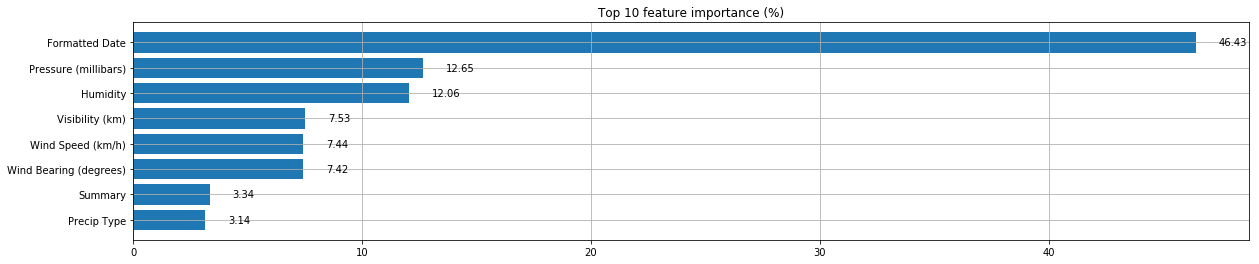


> Feature importances dumped into directory : save

predicting...
CPU time: 0.07164907455444336 seconds

> Overview on predictions : 

       Apparent Temperature (C)_predicted
94421                           15.503173
0                                0.225729
1                               -0.131246
2                                2.084118
3                                5.243113
4                                3.029584
5                                3.513928
6                                4.093424
7                                4.081194
8                                4.261081

dumping predictions into directory : save ...


In [10]:
pred = Predictor()
# For Default Configuration
pred.fit_predict(None, df)

# ***Creating Customised Search Space***

---



In [11]:
space = {
'ne__numerical_strategy': {"search":"choice", "space":[0, "mean"]},
'ce__strategy': {"search":"choice", "space":["label_encoding", "random_projection", "entity_embedding"]},
'fs__threshold':{"search":"uniform", "space":[0.001, 0.2]},
'est__strategy':{"search":"choice", "space":["RandomForest",
"ExtraTrees", "LightGBM"]},
'est__max_depth':{"search":"choice",
"space":[8, 9, 10, 11, 12, 13]}
}
best = opt.optimise(space, df)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.16139596343885362}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 38.14526295661926 seconds
##################################################### testing hyper-parameters... ###############################

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 32.88275623321533 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1991992391980336}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 8, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
  5%|▌         | 2/40 [01:11<22:12, 35.06s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 12.111019372940063 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18340417493133895}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 12, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
  8%|▊         | 3/40 [01:23<15:09, 24.59s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 5.578439950942993 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.16040188078276538}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 10, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 10%|█         | 4/40 [01:28<10:15, 17.09s/trial, be

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])

/usr/local/lib/py

MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 91.84878921508789 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.17905256355749175}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 10, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 12%|█▎        | 5/40 [03:00<25:42, 44.06s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 51.08832597732544 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1241464221408655}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 15%|█▌        | 6/40 [03:51<26:19, 46.46s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 10.048320770263672 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.16946358737425907}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 18%|█▊        | 7/40 [04:01<19:00, 34.56s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 37.70902872085571 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.12990607773204735}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 10, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 20%|██        | 8/40 [04:39<18:58, 35.57s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 7.520731687545776 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.0292827092431786}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 9, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 22%|██▎       | 9/40 [04:47<13:51, 26.81s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 6.886219024658203 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.16037210772131485}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 11, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 25%|██▌       | 10/40 [04:54<10:19, 20.66s/trial, best los

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.247413158416748 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.15023145853433625}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 11, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 28%|██▊       | 11/40 [04:57<07:24, 15.34s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 75.49049854278564 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.14765653677569612}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 9, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 30%|███       | 12/40 [06:12<15:41, 33.64s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 70.73646545410156 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.15742463629232067}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 8, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 32%|███▎      | 13/40 [07:23<20:11, 44.88s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 49.13638687133789 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.03478242961665083}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 12, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 35%|███▌      | 14/40 [08:12<20:00, 46.17s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 17.7297523021698 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.049052524264685676}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 11, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 38%|███▊      | 15/40 [08:30<15:40, 37.61s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 16.291213035583496 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.16477373642533627}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 10, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 40%|████      | 16/40 [08:46<12:28, 31.20s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 7.618318557739258 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.14945143365503316}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 12, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 42%|████▎     | 17/40 [08:54<09:14, 24.11s/trial, best los

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.1953606605529785 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.04377355786342923}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 10, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 45%|████▌     | 18/40 [08:57<06:32, 17.83s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 73.09962511062622 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18614760591475352}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 48%|████▊     | 19/40 [10:10<12:03, 34.43s/trial, best l

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 4.888036251068115 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.08219186750877643}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 13, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 50%|█████     | 20/40 [10:15<08:31, 25.57s/trial, bes

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.169347047805786 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.07807128151185347}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 52%|█████▎    | 21/40 [10:18<05:58, 18.85s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 80.99883437156677 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.19753572796312727}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 55%|█████▌    | 22/40 [11:39<11:15, 37.51s/trial, b

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 5.020705699920654 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.08455545575555393}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 13, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 57%|█████▊    | 23/40 [11:44<07:52, 27.77s/trial, bes

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.18312668800354 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.10158625831587223}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 60%|██████    | 24/40 [11:48<05:26, 20.40s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 80.79916429519653 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.19769724565347474}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 62%|██████▎   | 25/40 [13:08<09:38, 38.53s/trial, b

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 4.953418254852295 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.06743936134100631}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 13, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 65%|██████▌   | 26/40 [13:13<06:38, 28.46s/trial, bes

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.1776914596557617 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.11255123260624188}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 68%|██████▊   | 27/40 [13:17<04:31, 20.89s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 80.37700629234314 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.001496838215557017}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 70%|███████   | 28/40 [14:37<07:44, 38.74s/trial, 

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 4.878036260604858 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.06363632697448872}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 13, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 72%|███████▎  | 29/40 [14:42<05:14, 28.59s/trial, bes

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 3.1645455360412598 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.11478686780326959}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 8, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 75%|███████▌  | 30/40 [14:45<03:29, 20.97s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 68.21043419837952 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.013312922171181862}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 78%|███████▊  | 31/40 [15:53<05:16, 35.15s/trial, 

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 4.956196546554565 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.05941008128138292}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 80%|████████  | 32/40 [15:58<03:28, 26.10s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 19.46366834640503 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.13142683402655317}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 8, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 82%|████████▎ | 33/40 [16:18<02:48, 24.12s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 68.24379014968872 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.01614219408452057}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 12, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 85%|████████▌ | 34/40 [17:26<03:44, 37.37s/trial, 

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 4.929399490356445 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18853813624062943}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 88%|████████▊ | 35/40 [17:31<02:18, 27.64s/trial, best l

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 4.908294200897217 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.09120962223894742}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 90%|█████████ | 36/40 [17:36<01:23, 20.83s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 6.205996036529541 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.09998108124746444}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 92%|█████████▎| 37/40 [17:42<00:49, 16.45s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 19.17912268638611 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.13625106148409263}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 13, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 95%|█████████▌| 38/40 [18:02<00:34, 17.28s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 80.28376269340515 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.0716673510088465}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 11, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
 98%|█████████▊| 39/40 [19:22<00:36, 36.19s/trial, best loss: inf]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf)
CPU time: 75.47192072868347 seconds
100%|██████████| 40/40 [20:37<00:00, 30.94s/trial, best loss: inf]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'random_projection', 'est__max_depth': 13, 'est__strategy': 'RandomForest', 'fs__threshold': 0.16139596343885362, 'ne__numerical_strategy': 'mean'}


/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)




fitting the pipeline ...
CPU time: 71.23508763313293 seconds


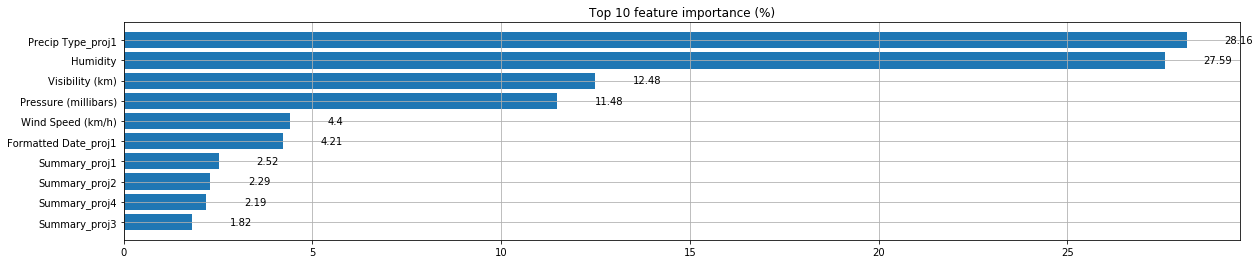


> Feature importances dumped into directory : save

predicting...
CPU time: 0.240739107131958 seconds

> Overview on predictions : 

       Apparent Temperature (C)_predicted
94421                           12.578797
0                                1.397059
1                                2.280648
2                                3.065130
3                                6.943046
4                                5.202964
5                                6.002479
6                                8.391880
7                                5.118345
8                                7.089556

dumping predictions into directory : save ...


In [12]:
# For Best Parameters from user defined search space
pred.fit_predict(best, df)